In [2]:
#-----------------------
#IMPORTACION DE LIBRERIAS
#-----------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import math
from matplotlib.ticker import FuncFormatter

#CONFIGURACION FORMATOS DE MONEDA
def formato_moneda(x, pos):
    return f"${x:,.0f}".replace(",", ".")

def formato_moneda_str(x):
    return f"${x:,.0f}".replace(",", ".")

#CONFIGURACION DE ESTILO DE GRÁFICAS
plt.style.use("seaborn-v0_8-darkgrid")
sns.set_palette("Dark2")
%matplotlib inline

#CONFIGURACION DE PANDAS
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)
pd.set_option("display.float_format", "{:,.2f}".format)

#Mensaje de bienvenida
print("-"*100)
print("SISTEMA DE ANALISIS DE COMPORTAMIENTO DE CREADORES DIGITALES (ACD)")
print("-"*100)

#-----------------------
# CARGAR DATASET
#-----------------------

df = pd.read_excel('/content/BD Proyecto.xlsx')
df_original = df.copy()



----------------------------------------------------------------------------------------------------
SISTEMA DE ANALISIS DE COMPORTAMIENTO DE CREADORES DIGITALES (ACD)
----------------------------------------------------------------------------------------------------


In [3]:
#-----------------------
#EXPLORACION DE DATOS
#-----------------------

print("\n")
print("-"*100)
print("EXPLORACION DE DATOS")
print("-"*100)


#Primeas 5 filas
print("\nPrimeras 5 filas")
print(df)

#Informacion general
print("\nInformacion general")
print(df.info())

#Reporte descriptivo
print("\nReporte descriptivo")
print(df.describe())

#Cantidad de valores nulos
print("\nReporte de valores nulos")
print(df.isnull().sum())

# Porcentaje de valores nulos en mi dataset
print("\nReporte del porcentaje valores nulos")
print((df.isnull().sum()/ len(df)*100).round(2))

print("\nDimensiones:", df.shape)
print("Columnas:", df.columns.tolist())

display(df.head())



----------------------------------------------------------------------------------------------------
EXPLORACION DE DATOS
----------------------------------------------------------------------------------------------------

Primeras 5 filas
                             Nombres     Tipo de documento      Cédula  \
0      Conred Alveiro Losada Montano  Cédula de ciudadanía     7691413   
1     Karol Daniela Leguizamo Garcia  Cédula de ciudadanía  1002721593   
2      Javier Andres Rubiano Urquijo  Cédula de ciudadanía  1073709946   
3             Patricia Montoya Olaya  Cédula de ciudadanía    51665218   
4              Cecilia Beltran Uribe  Cédula de ciudadanía    51638236   
...                              ...                   ...         ...   
4426       Erika Julieth Chiguasuque  Cédula de ciudadanía  1012328772   
4427   Karina Andrea Cano Villalobos  Cédula de ciudadanía  1000327361   
4428     Andres Felipe Mendoza Mejia  Cédula de ciudadanía  1007696230   
4429        Juan 

,Nombres,Tipo de documento,Cédula,Nacionalidad,Detalles,Sede,Horario creador,Fecha nacimiento,Fecha de retiro,Fecha de inicio,Tipo de creador,Deducciones,Adiciones,Periodos trabajados,Total creador,Ganancia,Total producido,% ganancia creador,% ganancia estudio
0,Conred Alveiro Losada Montano,Cédula de ciudadanía,7691413,Nacional,Eliminado,Suba,Noche,1975-04-30,2024-11-13,2024-09-25,Eliminada,863,0,1,21585,21585,43171,0.50,0.50
1,Karol Daniela Leguizamo Garcia,Cédula de ciudadanía,1002721593,Nacional,Eliminado,Marina Cams,Mañana,1993-02-08,2024-03-13,2023-06-07,Eliminada,655017,0,10,12224127,10829041,23053168,0.53,0.47
2,Javier Andres Rubiano Urquijo,Cédula de ciudadanía,1073709946,Nacional,Eliminado,CAV Soacha,Noche,1997-04-01,2025-03-13,2025-03-05,Eliminada,4430306,0,1,7661,7661,15322,0.50,0.50
3,Patricia Montoya Olaya,Cédula de ciudadanía,51665218,Nacional,Eliminado,Suba,Tarde,1960-09-05,2024-07-18,2024-06-25,Eliminada,335,0,1,8380,8380,16760,0.50,0.50
4,Cecilia Beltran Uribe,Cédula de ciudadanía,51638236,Nacional,Eliminado,Norte,Noche,1961-03-29,2025-08-20,2023-05-20,Eliminada,2774984,0,40,58785625,49008735,107794360,0.55,0.45


In [4]:
#-----------------------------------
#LIMPIEZA Y TRANSFORMACION DE DATOS
#-----------------------------------

print("\n")
print("-"*100)
print("LIMPIEZA Y TRANSFORMACION DE DATOS")
print("-"*100)

# 1. Limpieza de columnas
df.columns = [c.strip().replace('\xa0',' ').replace('  ',' ').replace('%','pct').replace('ñ','n') for c in df.columns]

df.rename(columns={
    'Fecha nacimiento':'Fecha_nacimiento',
    'Fecha de retiro':'Fecha_retiro',
    'Fecha de inicio':'Fecha_inicio',
    'Horario creador':'Horario_creador',
    'Total creador':'Total_creador',
    'Ganancia':'Ganancia',
    'Total producido':'Total_producido'
}, inplace=True, errors='ignore')

# 2. Convertir columnas de fechas
for col in ['Fecha_nacimiento','Fecha_retiro','Fecha_inicio']:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')

# 3. Convertir columnas numéricas
num_cols = ['Deducciones','Adiciones','Periodos trabajados','Total_creador','Ganancia','Total_producido','% ganancia creador','% ganancia estudio']
for c in num_cols:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors='coerce').fillna(0)

# 4. Duplicados
if 'Cedula' in df.columns:
    df = df.drop_duplicates(subset=['Cedula'], keep='first')
else:
    df = df.drop_duplicates()

# 5. Calcular edad a partir de la fecha de nacimiento hasta hoy
hoy = pd.to_datetime('today')

if 'Fecha_nacimiento' in df.columns:
    df['Edad'] = ((hoy - df['Fecha_nacimiento']).dt.days / 365.25).apply(lambda x: math.floor(x) if not pd.isna(x) else np.nan)




----------------------------------------------------------------------------------------------------
LIMPIEZA Y TRANSFORMACION DE DATOS
----------------------------------------------------------------------------------------------------


In [5]:
#-----------------------------------
#ANALISIS DE DATOS
#-----------------------------------

print("\n")
print("-"*100)
print("ANALISIS DE DATOS")
print("-"*100)


# RANGO DE EDAD
print("\n*** RANGO DE EDAD ***\n")
bins = [18,25,30,35,40,50,60,100]
labels = ['18-24','25-29','30-34','35-39','40-49','50-59','60+']
df['Rango_Edad'] = pd.cut(df['Edad'], bins=bins, labels=labels, right=False)
print("\nRango de edad:")
print(df['Rango_Edad'].value_counts())

#DESERCION
# 1.Deserción por detalles
df['Detalles_clean'] = df['Detalles'].astype(str).str.lower()
df['Desertor_detalles'] = df['Detalles_clean'].str.contains('eliminado')

total_creadores = df.shape[0]
desertores_texto = df['Desertor_detalles'].sum()
pct_desercion_texto = desertores_texto / total_creadores * 100

print("\n*** DESERCIÓN ***\n")
print(f"Total creadores: {total_creadores}")
print(f"Total Desertores: {desertores_texto}")
print(f"Porcentaje deserción: {pct_desercion_texto:.2f}%")

# 2. Deserción por fecha
df['Desertor_fecha'] = df['Fecha_retiro'].notna()

# 3. Deserción por año
df['Anio_retiro'] = df['Fecha_retiro'].dt.year.astype('Int64')
desercion_anual = df[df['Desertor_fecha']].groupby('Anio_retiro').size()

print("\nDeserción por año:")
print(desercion_anual)

# 4. Deserción por sede
if 'Sede' in df.columns:
    desercion_sede = df.groupby('Sede')['Desertor_detalles'].mean().sort_values(ascending=False) * 100

    print("\nDeserción por sede (%):")
    print(desercion_sede.round(2))

# 5. Deserción por rango de edad
desercion_edad = (
    df.groupby('Rango_Edad', observed=False)['Desertor_detalles']
      .mean()
      .sort_values(ascending=False) * 100
)

print("\nDeserción por rango de edad (%):")
print(desercion_edad.round(2))

# 6. Duración hasta retiro
df['Duracion_dias'] = (df['Fecha_retiro'] - df['Fecha_inicio']).dt.days
promedio_dias_retiro = df['Duracion_dias'].dropna().mean()

print("\nPromedio de duración hasta el retiro")
print(f"{promedio_dias_retiro:.0f} días en promedio")

# FACTURACIÓN
print("\n*** FACTURACIÓN ***\n")

#1. Máximos y mínimos de facturación por año
df['Anio_inicio'] = df['Fecha_inicio'].dt.year

facturacion_anualAgency = df.groupby('Anio_inicio')['Ganancia'].sum().sort_values(ascending=False)

facturacion_anualCreator = df.groupby('Anio_inicio')['Total_creador'].sum().sort_values(ascending=False)

print("\nFACTURACIÓN POR AÑO DE LA AGENCIA (Mayor → Menor)")
print(facturacion_anualAgency.apply(formato_moneda_str))

print("\nFACTURACIÓN POR AÑO DE LOS CREADORES (Mayor → Menor)")
print(facturacion_anualCreator.apply(formato_moneda_str))

#2. Facturación por sede
facturacion_sede_anual = df.pivot_table(
    index='Sede',
    columns='Anio_inicio',
    values='Ganancia',
    aggfunc='sum',
    fill_value=0
)

# ordenar por total
facturacion_sede_anual = facturacion_sede_anual.loc[
    facturacion_sede_anual.sum(axis=1).sort_values(ascending=False).index
]

facturacion_sede_anual_fmt = facturacion_sede_anual.map(formato_moneda_str)

print("\nAÑO DE MAYOR FACTURACIÓN POR SEDE (Tabla)")
display(facturacion_sede_anual_fmt)




----------------------------------------------------------------------------------------------------
ANALISIS DE DATOS
----------------------------------------------------------------------------------------------------

*** RANGO DE EDAD ***


Rango de edad:
Rango_Edad
18-24    2194
25-29    1270
30-34     454
35-39     244
40-49     212
50-59      48
60+         5
Name: count, dtype: int64

*** DESERCIÓN ***

Total creadores: 4431
Total Desertores: 4251
Porcentaje deserción: 95.94%

Deserción por año:
Anio_retiro
2022     221
2023    1656
2024    1391
2025     983
dtype: int64

Deserción por sede (%):
Sede
Bucaramanga   100.00
CAV Soacha     97.09
Tunal          95.85
Suba           95.75
Belen          95.70
Marina Cams    95.49
Norte          95.44
Cucuta         90.32
Satelite       89.89
Ibague         82.35
Name: Desertor_detalles, dtype: float64

Deserción por rango de edad (%):
Rango_Edad
30-34   97.14
35-39   97.13
25-29   96.30
18-24   95.81
40-49   93.87
50-59   85.42
60+

Anio_inicio,2021,2022,2023,2024,2025
Sede,,,,,
CAV Soacha,$0,$1.795.548.592,$2.106.459.171,$1.091.389.810,$228.976.344
Marina Cams,$0,$914.322.563,$873.350.615,$828.768.412,$282.656.341
Satelite,$361.688,$1.141.986.314,$1.398.579.838,$248.730.835,$37.762.535
Tunal,$0,$779.691.293,$625.331.015,$383.043.560,$154.930.481
Suba,$0,$845.634.021,$322.122.294,$404.195.471,$98.542.833
Norte,$0,$215.637.274,$442.813.208,$164.389.187,$75.986.875
Bucaramanga,$0,$256.995.055,$205.969.885,$0,$0
Belen,$0,$0,$114.272.690,$136.750,$378.933
Cucuta,$0,$0,$0,$0,$12.326.937




....................................................................................................
GRAFICO NACIONALIDAD:




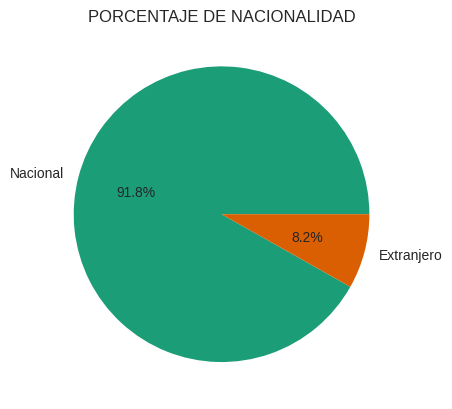



....................................................................................................
GRAFICO RANGO DE EDAD:




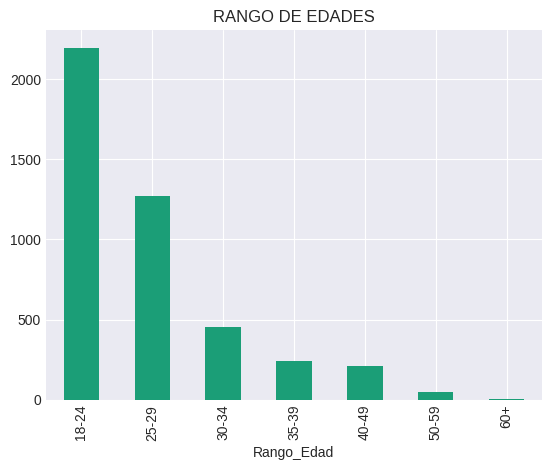



....................................................................................................
GRAFICO DESERCIÓN ANUAL:




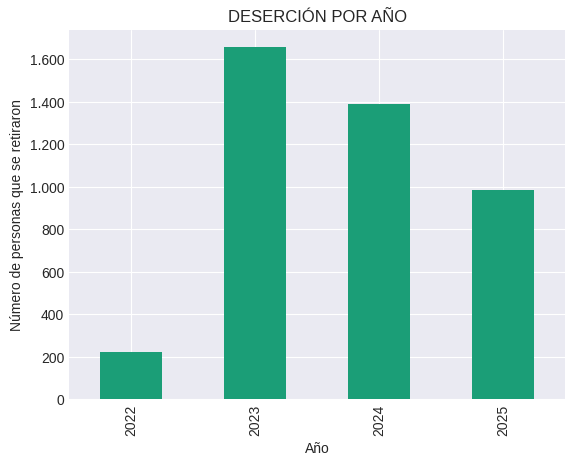



....................................................................................................
GRAFICO DESERCIÓN POR SEDE:




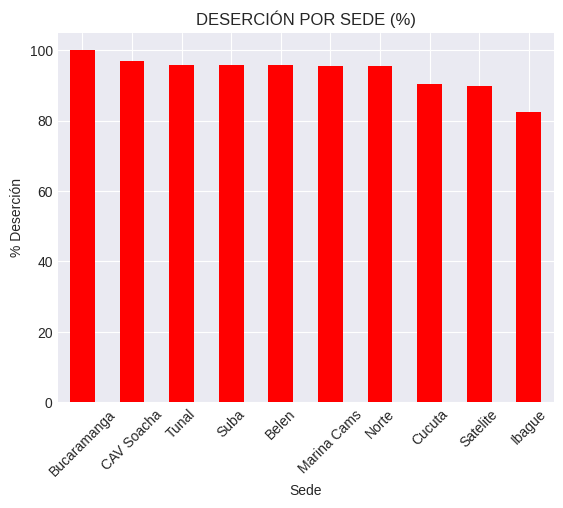



....................................................................................................
GRAFICO DESERCIÓN POR RANGO DE EDAD:




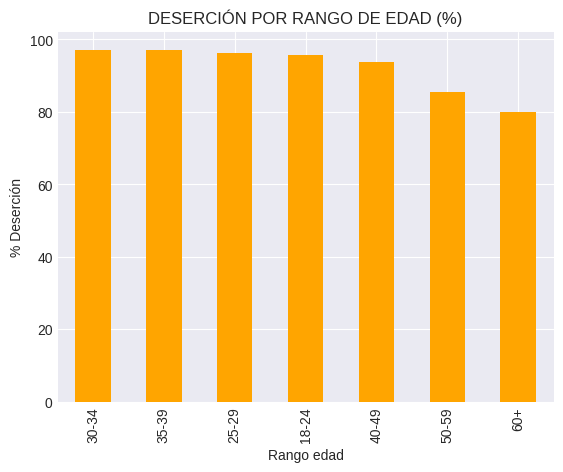



....................................................................................................
GRAFICO GANANCIA POR HORARIO:




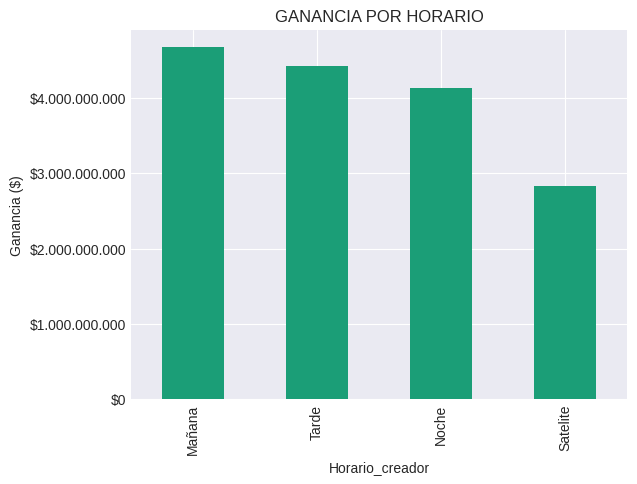



....................................................................................................
MAPA DE CALOR DE GANANCIA POR SEDE Y HORARIO:




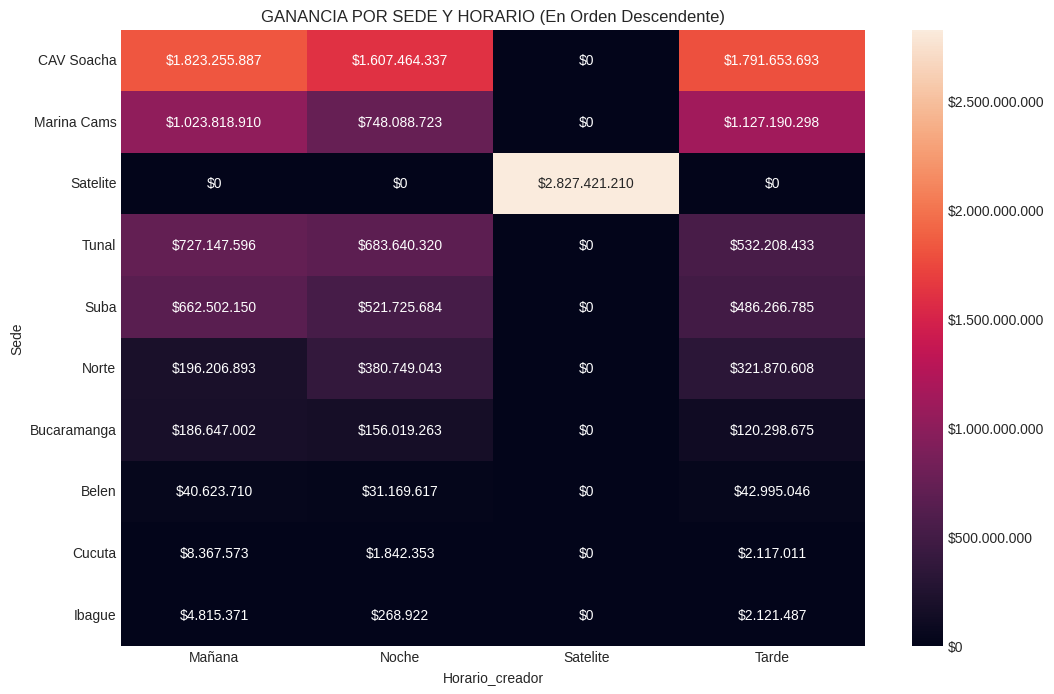



....................................................................................................
GRAFICA DE FACTURACIÓN POR AÑO:




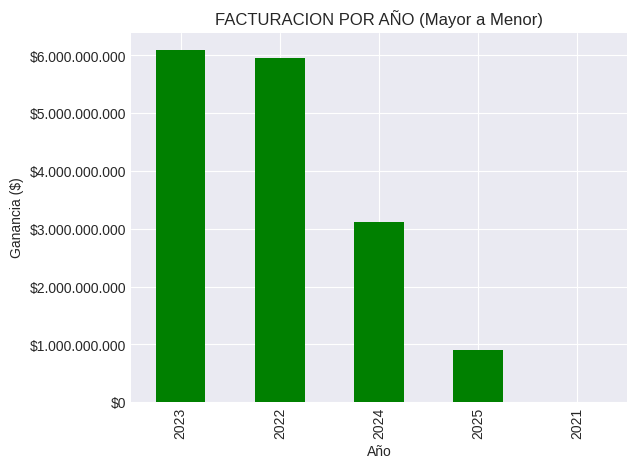



....................................................................................................
MAPA DE CALOR DE FACTURACIÓN POR SEDE Y AÑO:




<Figure size 640x480 with 0 Axes>

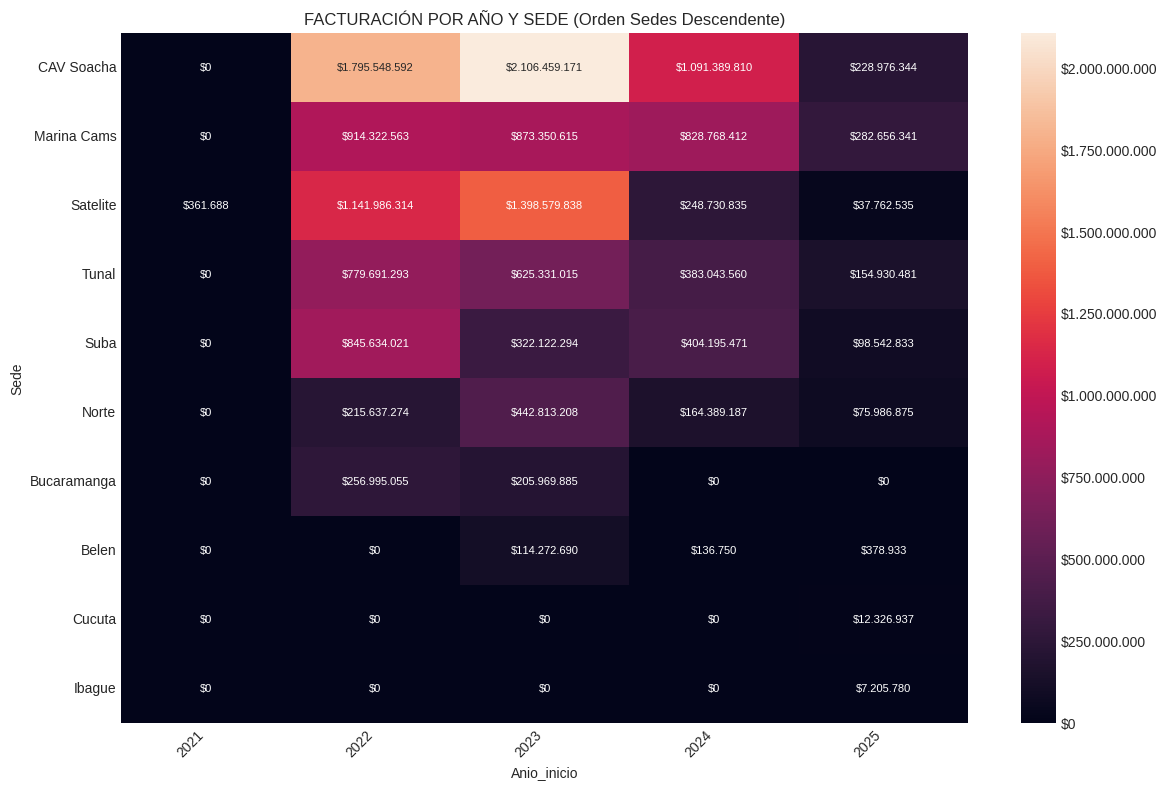

In [7]:
#-----------------------------------
#GRAFICOS
#-----------------------------------

# GRAFICO NACIONALIDAD
print("\n")
print("."*100)
print("GRAFICO NACIONALIDAD:")
print("\n")

nacional_counts = df['Nacionalidad'].value_counts()
plt.figure()
nacional_counts.plot.pie(autopct='%1.1f%%', title='PORCENTAJE DE NACIONALIDAD')
plt.ylabel('')
plt.show()

# GRAFICO RANGO DE EDAD
print("\n")
print("."*100)
print("GRAFICO RANGO DE EDAD:")
print("\n")

plt.figure()
df['Rango_Edad'].value_counts().sort_index().plot.bar()
plt.title('RANGO DE EDADES')
plt.show()


# GRAFICO DESERCIÓN ANUAL
print("\n")
print("."*100)
print("GRAFICO DESERCIÓN ANUAL:")
print("\n")

if len(desercion_anual) > 0:
    plt.figure()
    ax = desercion_anual.plot(kind="bar")
    ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f"{int(x):,}".replace(",", ".")))
    plt.title("DESERCIÓN POR AÑO")
    plt.ylabel("Número de personas que se retiraron")
    plt.xlabel("Año")
    plt.show()

else:
    print("\n No hay fechas para calcular deserción anual")


# GRAFICO DESERCIÓN POR SEDE

print("\n")
print("."*100)
print("GRAFICO DESERCIÓN POR SEDE:")
print("\n")

plt.figure()
ax = desercion_sede.plot(kind="bar", color="red")
plt.title("DESERCIÓN POR SEDE (%)")
plt.ylabel("% Deserción")
plt.xlabel("Sede")
plt.xticks(rotation=45)
plt.show()

# GRAFICO DESERCIÓN POR RANGO DE EDAD
print("\n")
print("."*100)
print("GRAFICO DESERCIÓN POR RANGO DE EDAD:")
print("\n")

plt.figure()
ax = desercion_edad.plot(kind="bar", color="orange")
plt.title("DESERCIÓN POR RANGO DE EDAD (%)")
plt.ylabel("% Deserción")
plt.xlabel("Rango edad")
plt.show()


# GRAFICO GANANCIA POR HORARIO
print("\n")
print("."*100)
print("GRAFICO GANANCIA POR HORARIO:")
print("\n")
if 'Ganancia' in df.columns and 'Horario_creador' in df.columns:
    plt.figure()
    ax = df.groupby('Horario_creador')['Ganancia'].sum().sort_values(ascending=False).plot.bar()
    ax.yaxis.set_major_formatter(FuncFormatter(formato_moneda))
    plt.title('GANANCIA POR HORARIO')
    plt.ylabel('Ganancia ($)')
    plt.show()


# MAPA DE CALOR GANANCIA POR SEDE Y HORARIO
print("\n")
print("."*100)
print("MAPA DE CALOR DE GANANCIA POR SEDE Y HORARIO:")
print("\n")

pivot = df.pivot_table(
    index='Sede',
    columns='Horario_creador',
    values='Ganancia',
    aggfunc='sum',
    fill_value=0
)

#Ordenar descendentemente por ganancia total
pivot = pivot.loc[pivot.sum(axis=1).sort_values(ascending=False).index]

#Formato moneda en anotaciones
pivot_fmt = pivot.map(formato_moneda_str)

plt.figure(figsize=(12,8))
sns.heatmap(
    pivot,
    annot=pivot_fmt,
    fmt="",
    cbar_kws={'format': FuncFormatter(formato_moneda)}
)
plt.title('GANANCIA POR SEDE Y HORARIO (En Orden Descendente)')
plt.gca().collections[0].colorbar.formatter = FuncFormatter(formato_moneda)
plt.gca().collections[0].colorbar.update_ticks()
plt.show()


#GRAFICA DE FACTURACIÓN POR AÑO
print("\n")
print("."*100)
print("GRAFICA DE FACTURACIÓN POR AÑO:")
print("\n")

plt.figure()
ax = facturacion_anualAgency.plot(kind="bar", color="green")
ax.yaxis.set_major_formatter(FuncFormatter(formato_moneda))
plt.title("FACTURACION POR AÑO (Mayor a Menor)")
plt.ylabel("Ganancia ($)")
plt.xlabel("Año")
plt.show()


# MAPA DE CALOR GANANCIA POR SEDE Y AÑO
print("\n")
print("."*100)
print("MAPA DE CALOR DE FACTURACIÓN POR SEDE Y AÑO:")
print("\n")
plt.tight_layout()
plt.show()
plt.figure(figsize=(12,8))

sns.heatmap(
    facturacion_sede_anual,
    annot=facturacion_sede_anual_fmt,
    fmt="",
    annot_kws={"size": 8},
    cbar_kws={'format': FuncFormatter(formato_moneda)}
)

plt.title("FACTURACIÓN POR AÑO Y SEDE (Orden Sedes Descendente)")
plt.xticks(rotation=45, ha='right')

plt.gca().collections[0].colorbar.formatter = FuncFormatter(formato_moneda)
plt.gca().collections[0].colorbar.update_ticks()

plt.tight_layout()
plt.show()